In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dir_path = os.getcwd()
plt.style.use("bmh")

In [29]:
features = pd.read_csv(os.path.join(dir_path, "data", "inputs", "fredmd_transf_df.csv"))
features["date"] = pd.to_datetime(features["date"])
features.set_index("date", inplace=True)

features.tail()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA
date,,,,,,,,,,,,,,,,,,,,,
2022-09-01,0.001310,0.002391,0.002582,0.000578,-0.001674,0.001956,-0.001360,-0.002311,-0.005121,-0.005275,...,-0.001806,-0.001200,0.007886,0.003543,0.002526,0.003887,0.003437,0.004459,-0.004180,0.005732
2022-10-01,0.004929,0.001923,0.003318,-0.001031,0.010616,0.000179,0.004620,0.007262,0.007908,0.018595,...,0.005658,-0.006425,0.004330,0.004571,0.003748,0.005603,0.004115,-0.003914,0.008315,0.004255
2022-11-01,0.001898,0.001797,-0.003194,-0.009608,-0.010802,-0.005831,-0.005445,-0.006610,-0.005735,-0.028380,...,-0.001741,-0.008484,0.004287,0.001492,-0.000069,0.002563,0.001659,-0.005663,-0.000514,0.003734
2022-12-01,0.001156,0.001590,-0.003321,0.015158,-0.010998,-0.010236,-0.008693,-0.006204,-0.001970,-0.017382,...,-0.007123,-0.008525,0.006835,0.000808,-0.001907,0.001186,0.002008,-0.002222,-0.006687,0.005549
2023-01-01,-0.000347,0.000936,0.011287,NaN,0.029199,0.000261,-0.000201,-0.001112,-0.006839,0.006837,...,0.003584,-0.000563,0.006279,0.005165,0.004168,0.005929,0.006175,0.002532,0.007575,0.006401


In [30]:
features_metadata = pd.read_csv(os.path.join(dir_path, "data", "utils", "fredmd_description.csv"), sep=";")

features_metadata.head()

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
0,1,5,First difference of natural log: ln(x)-ln(x-1),RPI,Real Personal Income,M_14386177,PI,Output and Income,False
1,2,5,First difference of natural log: ln(x)-ln(x-1),W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,Output and Income,False
2,3,5,First difference of natural log: ln(x)-ln(x-1),DPCERA3M086SBEA,Real personal consumption expenditures,M_123008274,Real Consumption,"Consumption, Orders, and Inventories",False
3,4,5,First difference of natural log: ln(x)-ln(x-1),CMRMTSPLx,Real Manu. and Trade Industries Sales,M_110156998,M&T sales,"Consumption, Orders, and Inventories",True
4,5,5,First difference of natural log: ln(x)-ln(x-1),RETAILx,Retail and Food Services Sales,M_130439509,Retail sales,"Consumption, Orders, and Inventories",True


In [31]:
features_metadata["description"].unique()

array(['Real Personal Income',
       'Real personal income ex transfer receipts',
       'Real personal consumption expenditures',
       'Real Manu. and Trade Industries Sales',
       'Retail and Food Services Sales', 'IP Index',
       'IP: Final Products and Nonindustrial Supplies',
       'IP: Final Products (Market Group)', 'IP: Consumer Goods',
       'IP: Durable Consumer Goods', 'IP: Nondurable Consumer Goods',
       'IP: Business Equipment', 'IP: Materials', 'IP: Durable Materials',
       'IP: Nondurable Materials', 'IP: Manufacturing (SIC)',
       'IP: Residential Utilities', 'IP: Fuels',
       'ISM Manufacturing: Production Index',
       'Capacity Utilization: Manufacturing',
       'Help-Wanted Index for United States',
       'Ratio of Help Wanted/No. Unemployed', 'Civilian Labor Force',
       'Civilian Employment', 'Civilian Unemployment Rate',
       'Average Duration of Unemployment (Weeks)',
       'Civilians Unemployed - Less Than 5 Weeks',
       'Civilians U

In [32]:
features_metadata.loc[features_metadata["description"] == 'CPI : All Items']

,id,tcode,ttype,fred,description,gsi,gsi:description,group,edited
112,113,6,Second difference of natural log: (ln(x)-ln(x-...,CPIAUCSL,CPI : All Items,M_110157323,CPI-U: all,Prices,False


<Axes: xlabel='date'>

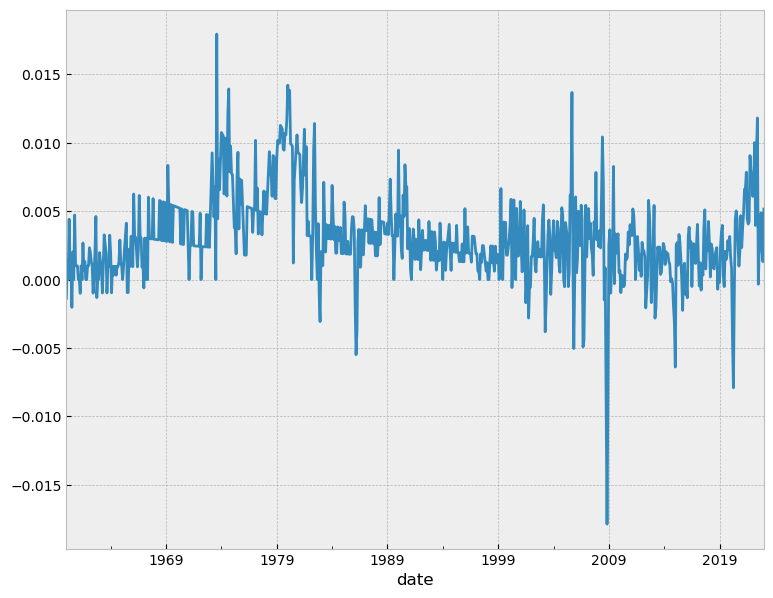

In [33]:
features["CPIAUCSL"].plot(figsize=(9, 7))